In [1]:
# Imports
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [2]:
!pip install -q -U watermark

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Rodrigo" --iversions

Author: Rodrigo

pandas    : 1.3.4
sys       : 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
sklearn   : 0.24.2
numpy     : 1.19.5
matplotlib: 3.4.3



In [4]:
# Carregando os dados
treino = pd.read_csv('dados/train.csv')
teste = pd.read_csv('dados/test.csv')

In [5]:
# Separando a classe nos dados de treino
range_class = np.arange(10)
y = np.asfarray(treino.iloc[:,0])

# Ajustando os datasets
treino_x = treino.iloc[:,1:].values
treino_y = np.array([(range_class == label).astype(np.float) for label in y])

In [6]:
# Ajustando os dados para teste
teste_x = teste.values

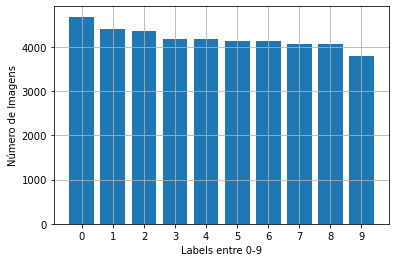

In [7]:
# Visualizando os Dados
y = treino.iloc[:,0].value_counts()
x = range(len(y))
plt.bar(x, y)
plt.xticks(x, x)
plt.ylabel('Número de Imagens')
plt.xlabel('Labels entre 0-9')
plt.grid()

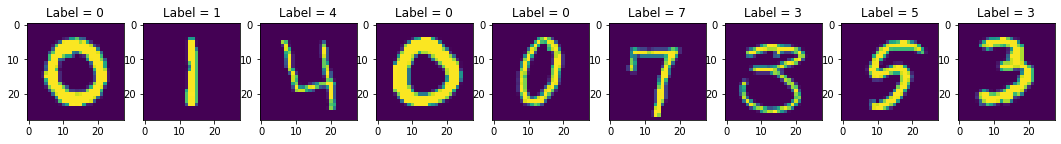

In [8]:
# Criando uma figura para exibir imagens em padrão de linhas e colunas (1 x 10)
figure = plt.figure()

# Definir manualmente a largura e a altura da figura
figure.set_size_inches(20.5, 8.5)

# Configurando uma imagem em cada figura com um título para o rótulo da imagem
for itr in range(1, 10):
    plt.subplot(1, 10, itr)
    label = treino.loc[itr,'label']
    pixels = treino.iloc[itr,1:].values.reshape((28,28))
    plt.title('Label = {label}'.format(label = label))
    plt.imshow(pixels)

# Exibindo toda a imagem presente na figura
plt.show()

In [9]:
# Normalizando os Dados de entrada x
treino_x = treino_x / 255.
teste_x  = teste_x  / 255.

In [10]:
# Visualizando o formato dos dados
shape_x = treino_x.shape
shape_y = treino_y.shape

# Total de linhas (observações ou exemplos)
total = treino_y.shape[0]

# Print
print ('O shape de X é: ' + str(shape_x))
print ('O shape de Y é: ' + str(shape_y))
print ('Temos %d exemplos de treinamento!' % (total))

O shape de X é: (42000, 784)
O shape de Y é: (42000, 10)
Temos 42000 exemplos de treinamento!


In [11]:
#Definindo o tamanho das camadas
def layer_size(X, Y):
    
    n_x = X.shape[1]
    n_h = 4
    n_y = Y.shape[1]
    
    return (n_x, n_h, n_y)

In [12]:
#Inicialização dos parâmetros
def initialise_parameter(n_x, n_h, n_y):
    
    np.random.seed(0)
    
    W1 = np.random.randn(n_h[0], n_x) * 0.1
    b1 = np.zeros(shape = (n_h[0], 1))
    
    W2 = np.random.randn(n_h[1], n_h[0]) * 0.1
    b2 = np.zeros(shape = (n_h[1], 1))
    
    W3 = np.random.randn(n_y, n_h[1]) * 0.1
    b3 = np.zeros(shape = (n_y, 1))
    
    assert(W1.shape == (n_h[0], n_x))
    assert(b1.shape == (n_h[0], 1))

    assert(W2.shape == (n_h[1], n_h[0]))
    assert(b2.shape == (n_h[1], 1))
    
    assert(W3.shape == (n_y, n_h[1]))
    assert(b3.shape == (n_y, 1))
    
    parameters = {"W1": W1, 
                  "b1": b1, 
                  "W2": W2, 
                  "b2": b2, 
                  "W3": W3, 
                  "b3": b3
                 }
    
    return parameters

In [13]:
#Função de Ativação
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [14]:
#Função Forward Propagation
def forward_propagation(X, parameters):
    
    # Coleta os parâmetros do dicionário parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Camada de entrada
    Z1 = (np.dot(W1, X.T) + b1).T
    
    # Função de Ativação
    A1 = sigmoid(Z1)
    
    # Camada oculta 1
    Z2 = (np.dot(W2, A1.T) + b2).T
    
    # Função de Ativação
    A2 = sigmoid(Z2)
    
    # Camada oculta 2 
    Z3 = (np.dot(W3, A2.T) + b3).T
    
    # Função de Ativação
    # Como vai entregar as probabilidades, não precisamos de uma camada de saída
    A3 = sigmoid(Z3)
    
    assert(A3.shape == (X.shape[0], 10))
    
    cache = {
        "Z1" : Z1,
        "A1" : A1,
        "Z2" : Z2,
        "A2" : A2,
        "Z3" : Z3,
        "A3" : A3
    }

    return A3, cache

In [15]:
#Função de custo
def compute_cost(A3, Y):
    
    # Número de linhas de Y
    m = Y.shape[0] 
    
    # Log das probabilidades das previsões
    logprobs = np.multiply(Y, np.log(A3)) + np.multiply((1 - Y), np.log(1 - A3))
    
    # Cálculo do custo
    cost = - np.sum(logprobs) / m
    
    # Ajuste do formato dos dados
    cost = float(np.squeeze(cost))
    
    assert(isinstance(cost, float))
    
    return cost

In [16]:
#Backward Propagation
def backward_propagation(parameters, cache, X, Y):
    
    # Shape de Y
    m = Y.shape[0]
    
    # Extrai do "cache" os valores da saída de cada ativação
    A1 = cache["A1"]
    A2 = cache["A2"]
    A3 = cache["A3"]
    
    # Extrai os parâmetros
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    # Calcula a derivada do custo (perceba que estamos calculando na sequência inversa ao forward propagation)
    dZ3 = (A3 - Y)
    dW3 = (1 / m) * np.dot(dZ3.T, A2)
    db3 = (1 / m) * np.sum(dZ3, keepdims = True)

    dZ2 = np.multiply(np.dot(dZ3, W3), sigmoid_derivative(A2))
    dW2 = (1 / m) * np.dot(dZ2.T, A1)
    db2 = (1 / m) * np.sum(dZ2, keepdims = True)
    
    dZ1 = np.multiply(np.dot(dZ2, W2), sigmoid_derivative(A1))
    dW1 = (1 / m) * np.dot(dZ1.T, X)
    db1 = (1 / m) * np.sum(dZ1, keepdims = True)
    
    # Dicionário de gradientes
    grads = {"dW1": dW1, 
             "db1": db1, 
             "dW2": dW2, 
             "db2": db2, 
             "dW3": dW3, 
             "db3": db3
            }
    
    return grads

In [17]:
#Atualização dos coeficientes
def update_parameters(parameters, grads, learning_rate):
    
    # Extrai os pesos
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # Extrai os gradientes
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    dW3 = grads["dW3"]
    db3 = grads["db3"]
    
    # Multiplica os gradientes pela taxa de aprendizagem e então subtrai do valor do coeficiente
    # O gradiente define a direção da mudança (positiva ou negativa)
    # A taxa de aprendizagem define a magnitude (mudança maior ou menor)
    W1 = W1 - (learning_rate * dW1)
    b1 = b1 - (learning_rate * db1)
    W2 = W2 - (learning_rate * dW2)
    b2 = b2 - (learning_rate * db2)
    W3 = W3 - (learning_rate * dW3)
    b3 = b3 - (learning_rate * db3)
    
    # Novo dicionário de parâmetros
    parameters = {"W1": W1, 
                  "b1": b1, 
                  "W2": W2, 
                  "b2": b2, 
                  "W3": W3, 
                  "b3": b3
                 }
    
    return parameters

In [18]:
#Função para previsão
def predict(X, parameters):
    
    m = X.shape[0]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    A3, cache = forward_propagation(X, parameters)
    
    return A3

In [19]:
#Modelo Rede Neural
def nn_model(X, Y, n_h, learning_rate, num_iterations, print_cost = False):

    # Para reproduzir sempre os mesmos resultados
    np.random.seed(3)

    # Lista para o custo em cada iteração
    cost_per_iter = []
    
    # Tamanho das camadas
    n_x = layer_size(X, Y)[0]
    n_y = layer_size(X, Y)[2]
    
    # Inicialização dos parâmetros
    parameters = initialise_parameter(n_x, n_h, n_y)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, pesos". Outputs: "A2, cache".
        A3, cache = forward_propagation(X, parameters)
        
        # Função de custo. Inputs: "A2, Y, pesos". Outputs: "custo".
        cost = compute_cost(A3, Y)
 
        # Grava o custo por iteração
        cost_per_iter.append(cost)

        # Backpropagation. Inputs: "pesos, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent. Inputs: "pesos, grads". Outputs: "pesos".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Imprime o custo a cada 100 iterações
        if print_cost and i % 100 == 0:
            print ("Custo após iteração %i: %f" %(i, cost))
    
    # Previsão em treino
    train_prediction = (treino.iloc[:,0].values != np.array(predict(treino_x, parameters).argmax(axis = 1)).T).astype(int)

    # Previsão em teste
    test_prediction = np.vstack((np.arange(1,28001), predict(teste_x, parameters).argmax(axis = 1).T)).T
    
    # Dados para submeter ao Kaggle mais tarde (opcional)
    data_to_submit = pd.DataFrame(test_prediction, columns = ['ImageId','Label']) 
    
    # Print
    print("Acurácia em Treino: {} %".format(100 - np.mean(train_prediction) * 100))
    
    # Saída
    output = {
        "cost" : cost_per_iter[-1],
        "parameters" : parameters,
        "cost_per_iter" : cost_per_iter,
        "train_prediction" : train_prediction,
        "test_prediction" : test_prediction,
        "data_to_submit" : data_to_submit
    }
    
    return output

Taxa de Aprendizado = 2.1
Custo após iteração 0: 6.616198
Custo após iteração 100: 1.916392
Custo após iteração 200: 0.918496
Acurácia em Treino: 91.7 %
O custo é: 0.6334650620313301
-------------------------------------------------------



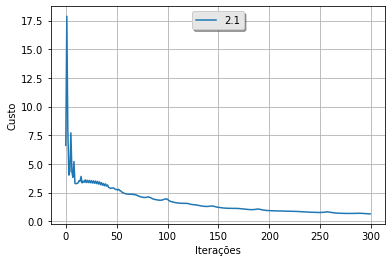

In [20]:
#Função Treinamento
models = {}
learning_rates = [2.1]

# Loop de treinamento
for i in learning_rates:
    
    # Print
    print ("Taxa de Aprendizado = " + str(i))
    
    models[str(i)] = nn_model(treino_x, 
                              treino_y, 
                              n_h = [400, 40], 
                              learning_rate = i, 
                              num_iterations = 300, 
                              print_cost = True)
    
    
    print ("O custo é: " + str(models[str(i)]["cost"]))
    print ("-------------------------------------------------------" + '\n')

# Plot do custo por iteração
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["cost_per_iter"]), label = str(i))

# Plot
plt.ylabel('Custo')
plt.xlabel('Iterações')
legend = plt.legend(loc = 'upper center', shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.grid()
plt.show()